In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# 45 derecelik sobel filtresi kullanan sobel fonksiyonu yazıldı
def sobel_45_degree(input_image):
    kernel = np.array([[0,1,2],[-1,0,1],[-2,-1,0]])
    out = cv2.filter2D(input_image,cv2.CV_8U, kernel)
    return abs(out)

In [3]:
#-45 derecelik sobel filtresi kullanan sobel fonksiyonu yazıldı
def sobel_minus_45_degree(input_image):
    kernel = np.array([[-2,-1,0],[-1,0,1],[0,1,2]])
    out = cv2.filter2D(input_image, cv2.CV_8U, kernel)
    return abs(out)

In [4]:
def otsu_threshold(input_image):
    # Histogramdaki değer sayısı
    bins_num = 256
    
    # Görüntünün Histogramı
    hist, bin_edges = np.histogram(input_image, bins=bins_num)

    # Normalize Histogram
    hist = np.divide(hist.ravel(), hist.max())

    # Merkezdeki değerleri bulma
    bin_mids = (bin_edges[:-1] + bin_edges[1:]) / 2.

    # cdf değerlerini bulup ağırlıklara eşitleme
    weight1 = np.cumsum(hist)
    weight2 = np.cumsum(hist[::-1])[::-1]

    # mean1 ve mean2 değerlerini bulma
    mean1 = np.cumsum(hist * bin_mids) / weight1
    mean2 = (np.cumsum((hist * bin_mids)[::-1]) / weight2[::-1])[::-1]

    inter_class_variance = weight1[:-1] * weight2[1:] * (mean1[:-1] - mean2[1:]) ** 2

    # maksimum değeri çekme işlemi
    index_of_max_val = np.argmax(inter_class_variance)
    #threshold değerinin bulunması
    threshold = bin_mids[:-1][index_of_max_val]
    print("Otsu's algorithm implementation thresholding result: ", threshold)
    # hesaplanan threshold değeri ile görüntünün thresholdunun alınması ve otsu listesine eklenmesi 
    
    ret1,otsuth1 = cv2.threshold(input_image,threshold,255,cv2.THRESH_BINARY)
    return otsuth1

## 1)

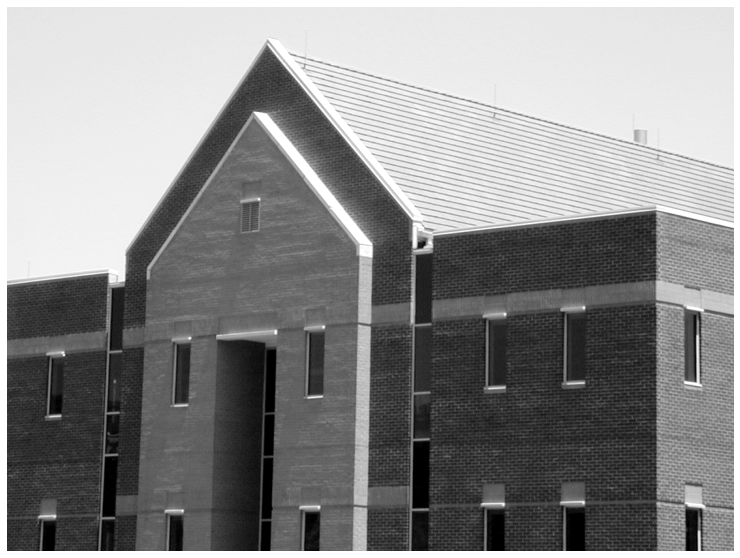

In [5]:
img = cv2.imread('Fig1016(a)(building_original).pgm',-1)


plt.figure(figsize=(20,10))
plt.imshow(img,cmap='gray')
plt.axis('off')
plt.show()

In [6]:
sobelx = sobel_45_degree(img)
sobely = sobel_minus_45_degree(img)
sobel = abs(sobelx)+abs(sobely)

In [7]:
print(np.amax(sobelx))

255


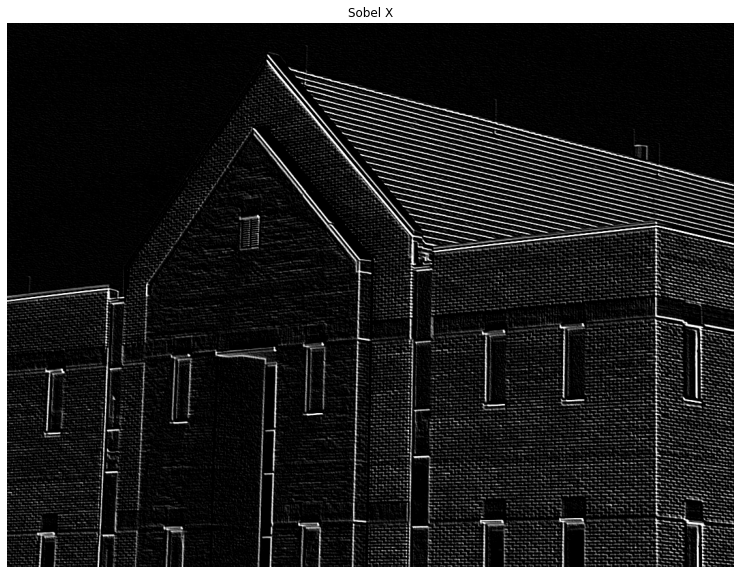

In [8]:
plt.figure(figsize=(20,10))
plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X')
plt.axis('off')
plt.show()

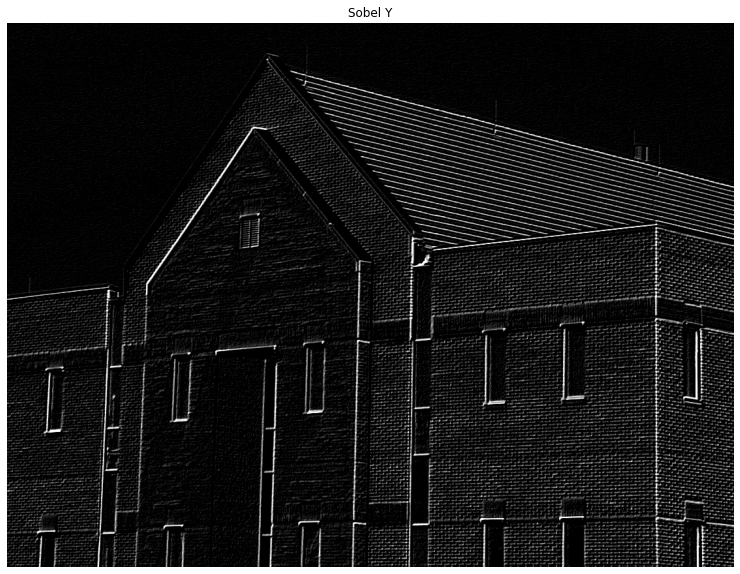

In [9]:
plt.figure(figsize=(20,10))
plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y')
plt.axis('off')
plt.show()

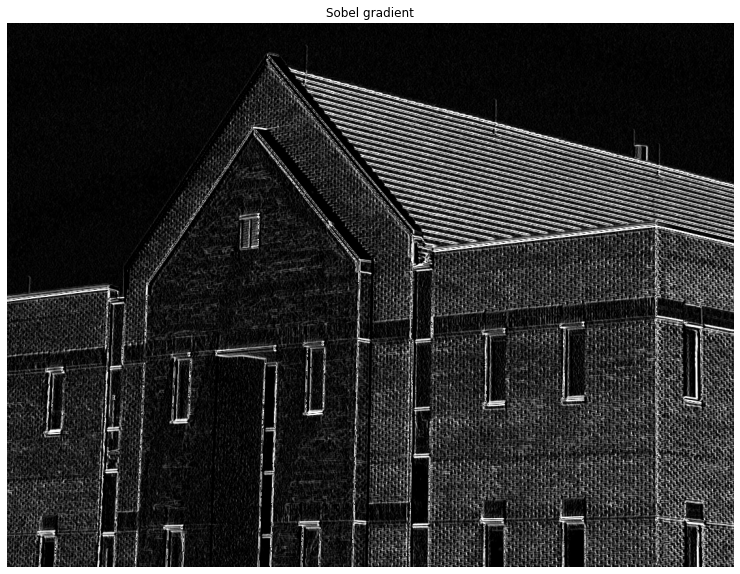

In [10]:
plt.figure(figsize=(20,10))
plt.imshow(sobel,cmap = 'gray')
plt.title('Sobel gradient')
plt.axis('off')
plt.show()

# Otsu eşikleme yöntemi

In [11]:
otsu_threshold_house = otsu_threshold(sobel)

Otsu's algorithm implementation thresholding result:  83.173828125


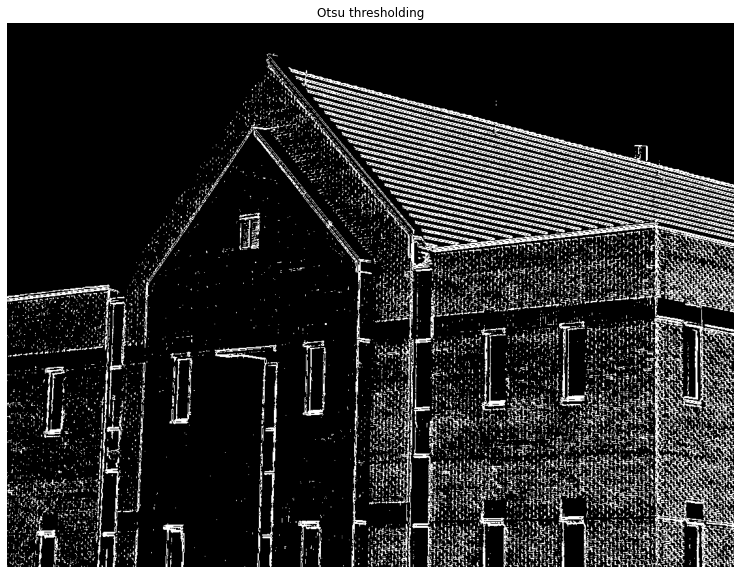

In [12]:
plt.figure(figsize=(20,10))
plt.imshow(otsu_threshold_house, cmap='gray')
plt.title('Otsu thresholding')
plt.axis('off')
plt.show()

# 10.20 (a) ve (b) görüntüleri elde etme

In [13]:
#Averaging filter uygulanması
img_smoothed = cv2.blur(img,(5,5))

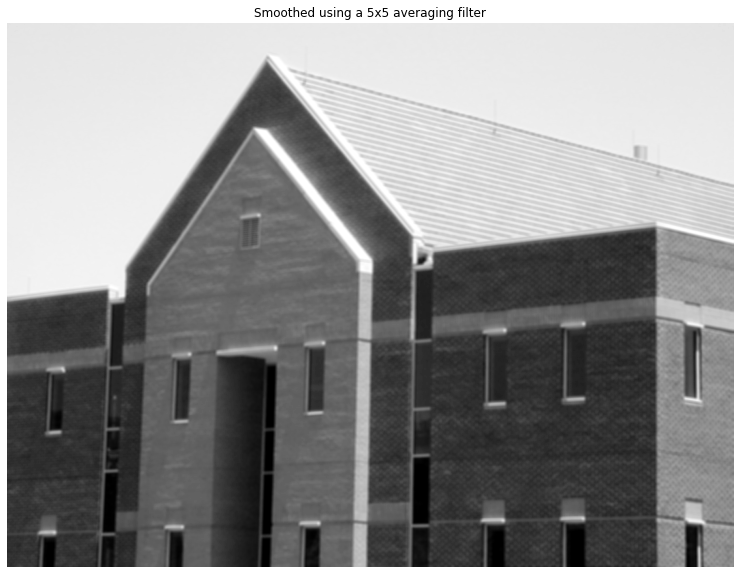

In [14]:
plt.figure(figsize=(20,10))
plt.imshow(img_smoothed,cmap='gray')
plt.title('Smoothed using a 5x5 averaging filter')
plt.axis('off')
plt.show()

In [15]:
sobelx_smoothed = sobel_45_degree(img_smoothed)
sobely_smoothed = sobel_minus_45_degree(img_smoothed)
sobel_smoothed = abs(sobelx_smoothed)+abs(sobely_smoothed)

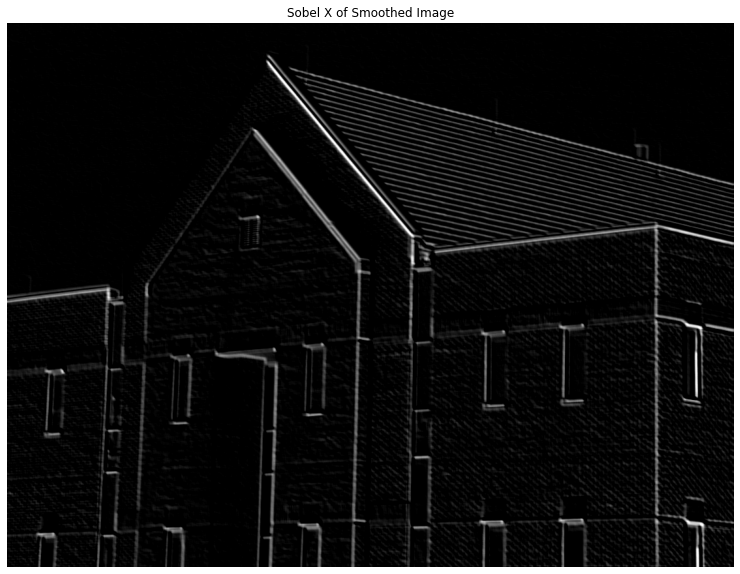

In [16]:
plt.figure(figsize=(20,10))
plt.imshow(abs(sobelx_smoothed),cmap = 'gray')
plt.title('Sobel X of Smoothed Image')
plt.axis('off')
plt.show()

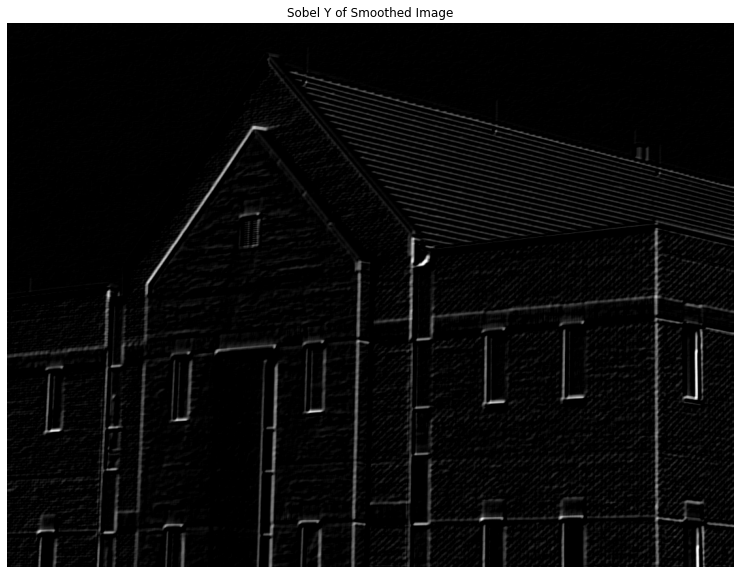

In [17]:
plt.figure(figsize=(20,10))
plt.imshow(abs(sobely_smoothed),cmap = 'gray')
plt.title('Sobel Y of Smoothed Image')
plt.axis('off')
plt.show()

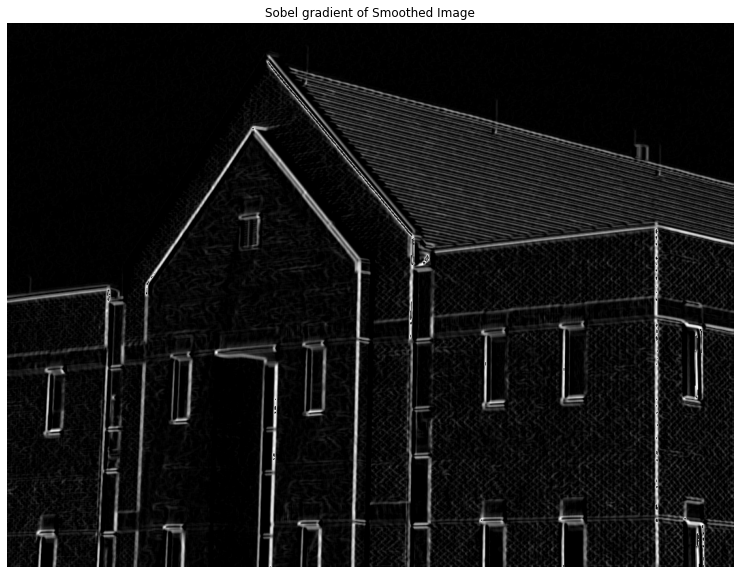

In [18]:
plt.figure(figsize=(20,10))
plt.imshow(abs(sobel_smoothed),cmap = 'gray')
plt.title('Sobel gradient of Smoothed Image')
plt.axis('off')
plt.show()

In [19]:
#Sobel gradiantları bulunan orjinal ve smoothed görüntülere Threshold uygulaması
maxvalue_original_sobel = np.amax(sobel) #Fig10.16(d)
maxvalue_smoothed_sobel = np.amax(sobel_smoothed) #Fig10.18(d)
print("Max value of sobel gradiant of the original image: {} ".format(maxvalue_original_sobel))
print("Max value of sobel gradiant of the smoothed image: {} ".format(maxvalue_smoothed_sobel))

_,smoothed_threshold = cv2.threshold(sobel_smoothed,maxvalue_smoothed_sobel*33/100,maxvalue_smoothed_sobel,cv2.THRESH_TOZERO)
_,original_threshold = cv2.threshold(sobel,int(maxvalue_original_sobel*33/100),maxvalue_original_sobel,cv2.THRESH_TOZERO)

Max value of sobel gradiant of the original image: 255 
Max value of sobel gradiant of the smoothed image: 255 


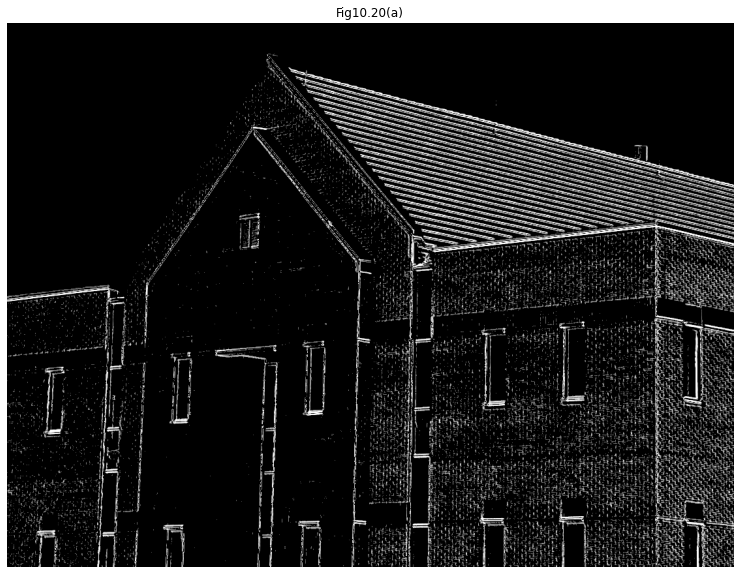

In [20]:
plt.figure(figsize=(20,10))
plt.imshow(original_threshold, cmap='gray')
plt.title('Fig10.20(a)')
plt.axis('off')
plt.show()

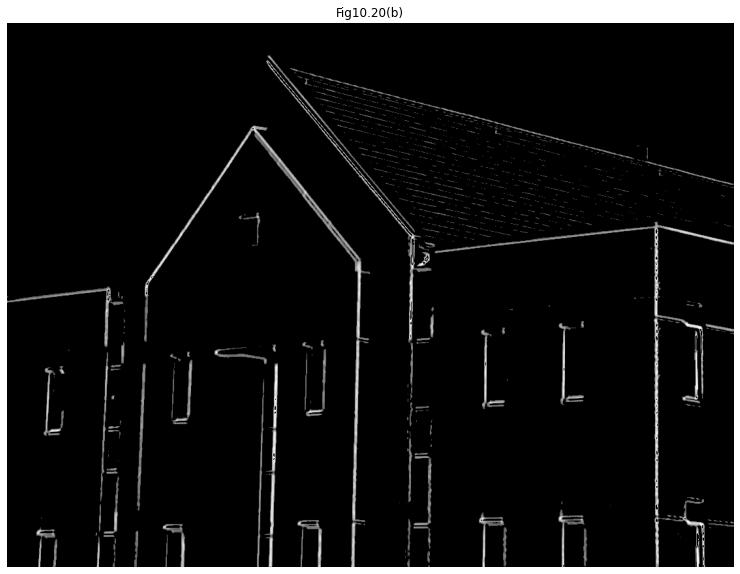

In [21]:
plt.figure(figsize=(20,10))
plt.imshow(smoothed_threshold, cmap='gray')
plt.title('Fig10.20(b)')
plt.axis('off')
plt.show()

In [22]:
cv2.imwrite('Fig1020(b).pgm',smoothed_threshold)
cv2.imwrite('Fig1020(a).pgm',original_threshold)


True

## 2)

In [23]:
img_normalized = img.astype('uint8') / 255.
Gaussian = cv2.GaussianBlur(img_normalized,(25,25),4) # step 1 Gaussian LPF 
Laplacian = cv2.Laplacian(Gaussian,cv2.CV_64F) #Laplacian of Gaussian
Laplacian_norm = Laplacian/Laplacian.max()*255 # Normalize 

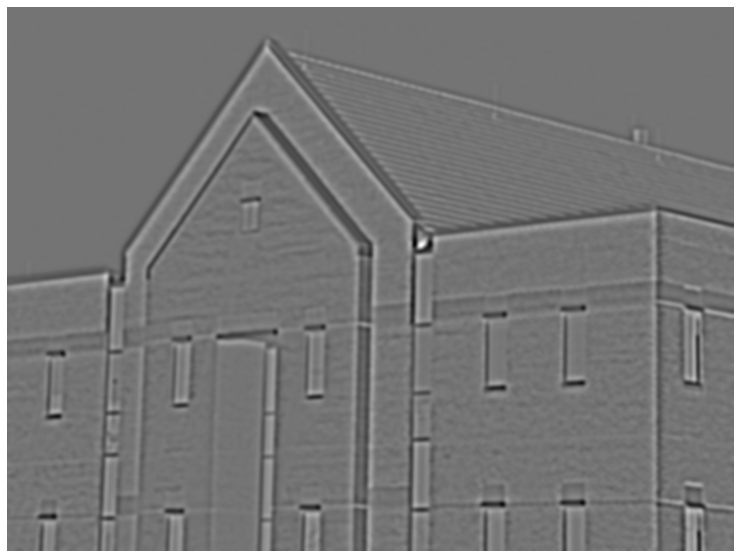

In [24]:
plt.figure(figsize=(20,10))
plt.imshow(Laplacian_norm,cmap='gray')
plt.axis('off')
plt.show()

In [25]:
cv2.imwrite('Fig1022(b).pgm',Laplacian_norm)

True

In [26]:
max_value_LoG=np.amax(Laplacian_norm)
min_value_LoG=np.amin(Laplacian_norm)

_,zero_crossingg = cv2.threshold(Laplacian_norm,max_value_LoG*3/100,max_value_LoG,cv2.THRESH_BINARY)
print(max_value_LoG)
print(min_value_LoG)

255.0
-212.3880076008901


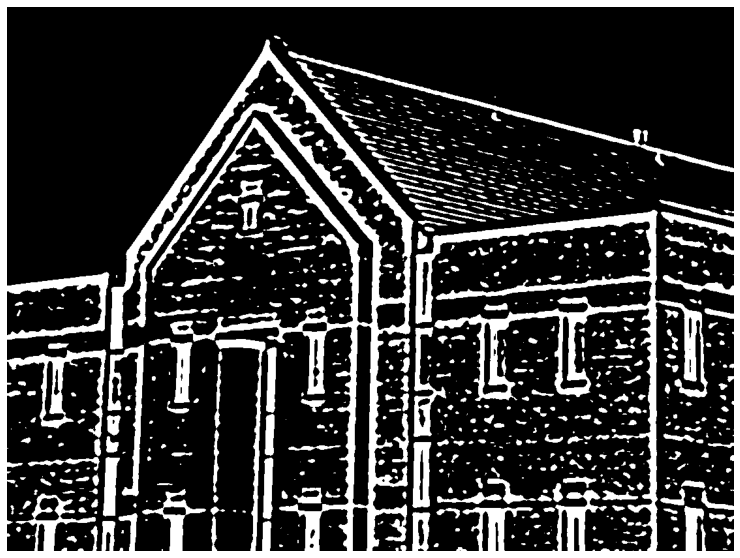

In [27]:
plt.figure(figsize=(20,10))
plt.imshow(zero_crossingg,cmap='gray')
plt.axis('off')
plt.show()

In [28]:
#Zero crossing bulma

w= len(img)
h= len(img[0])
edges=np.zeros((w,h))

for x in range(0,w-1):
    for y in range(0,h-1):
        if(Laplacian[x][y]*Laplacian[x+1][y]<0 or Laplacian[x][y]*Laplacian[x][y+1]<0): #zero crossing bulunma işlemi
            edges[x][y]=1

zero_crossing = np.asarray(edges) # Bulunan noktalar numpy array olarak atandı

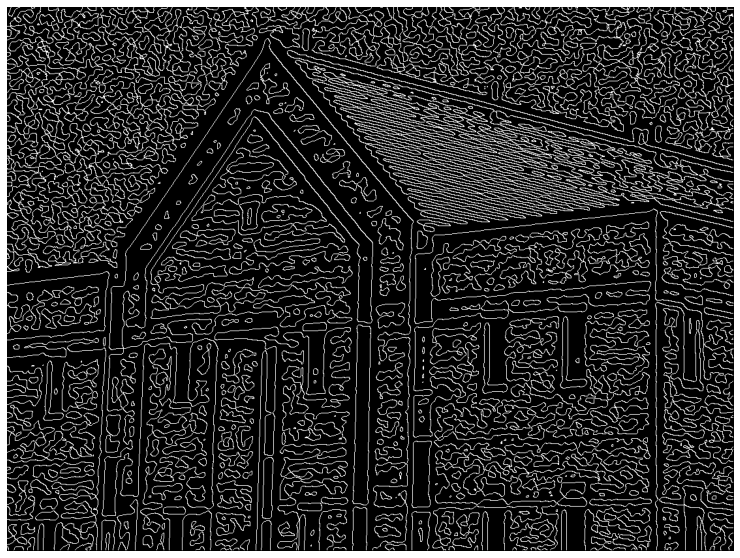

In [29]:
plt.figure(figsize=(20,10))
plt.imshow(zero_crossing,cmap='gray')
plt.axis('off')
plt.show()

## 3)

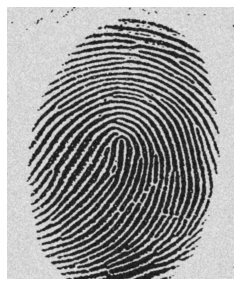

In [30]:
img_fingerprint = cv2.imread('Fig1038(a)(noisy_fingerprint).pgm',0)

plt.figure(figsize=(10,5))
plt.imshow(img_fingerprint,cmap='gray')
plt.axis('off')
plt.show()

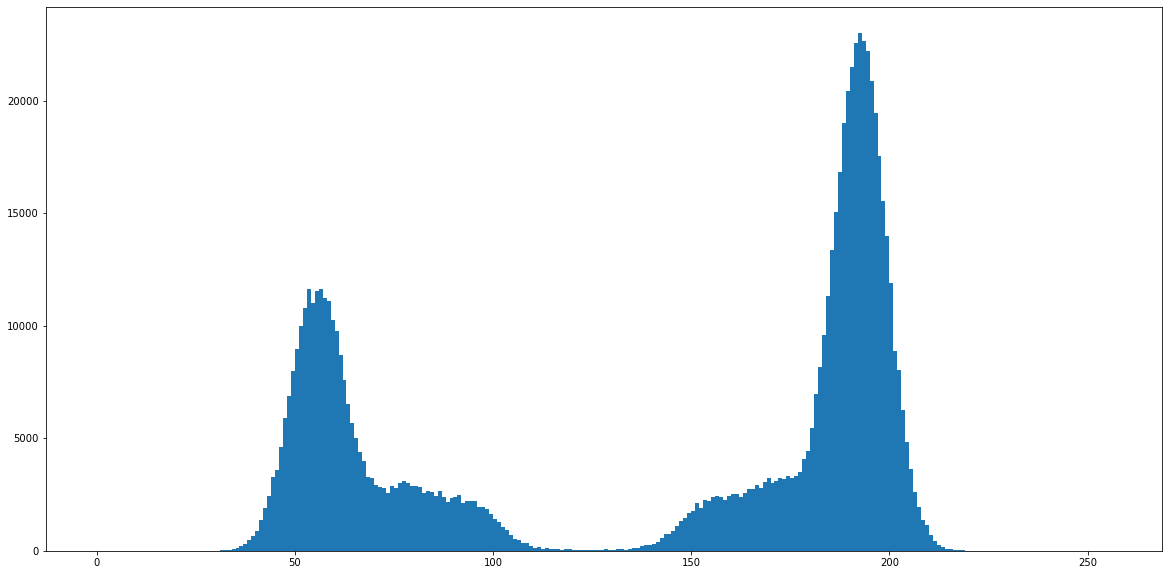

In [31]:
plt.figure(figsize=(20,10))
plt.hist(img_fingerprint.ravel(),256,[0,256]) 
plt.savefig('Fig1038(b).png')
plt.show()


In [32]:
#Glabal threshold Fonksiyonu yazıldı
def global_threshold(image, thres_value):
    img = image.copy() #Giriş görüntüsü kopyalandı
    for i in range(image.shape[0]):   #Satır ve sütün boyunca pikseller threshold değerinden büyükse 255, 
        for j in range(image.shape[1]): # küçükse 0 olacak şekilde ayarlandı
            if image[i,j] > thres_value:
                img[i,j] = 255
            else:
                img[i,j] = 0
    return img

global_threshold_output = global_threshold(img_fingerprint, 125)

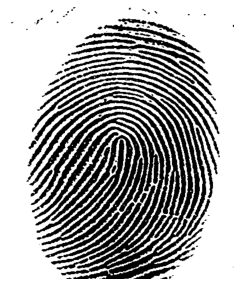

In [33]:
plt.figure(figsize=(10,5))
plt.imshow(global_threshold_output,cmap='gray')
plt.axis('off')
plt.show()

In [34]:
cv2.imwrite('Fig1038(c).pgm',global_threshold_output)

True

## 4)

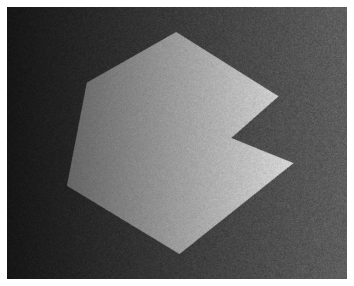

In [35]:
img_septagon = cv2.imread('Fig1046(a)(septagon_noisy_shaded).pgm',0)
plt.figure(figsize=(10,5))
plt.imshow(img_septagon,cmap='gray')
plt.axis('off')
plt.show()

# b)

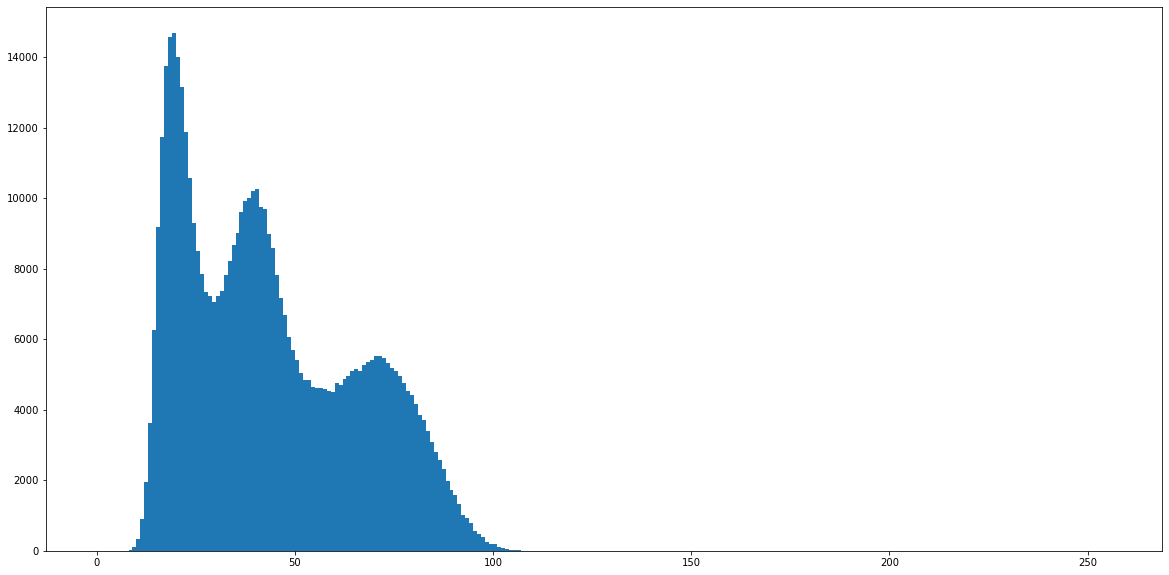

In [36]:
plt.figure(figsize=(20,10))
plt.hist(img_septagon.ravel(),256,[0,256]) #Histogram gösterimi için ravel() komutu kullanıldı
plt.savefig('Fig1046(b).png')
plt.show()

# c)

In [37]:
septagon_global_threshold_output = global_threshold(img_septagon, 48)

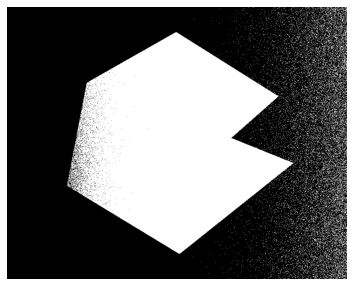

In [38]:
plt.figure(figsize=(10,5))
plt.imshow(septagon_global_threshold_output,cmap='gray')
plt.axis('off')
plt.show()

In [39]:
cv2.imwrite('Fig1046(c).pgm',septagon_global_threshold_output)

True

# d)

In [40]:
otsu_of_septagon = otsu_threshold(img_septagon)

Otsu's algorithm implementation thresholding result:  48.841796875


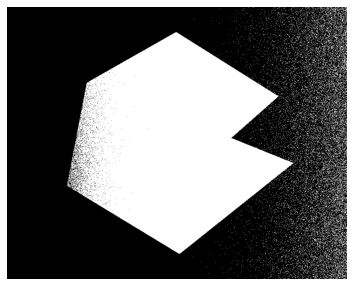

In [41]:
plt.figure(figsize=(10,5))
plt.imshow(otsu_of_septagon,cmap='gray')
plt.axis('off')
plt.show()

In [42]:
cv2.imwrite('Fig1046(d).pgm',otsu_of_septagon)

True

# e)

In [43]:
img_septagon.shape

(651, 814)

In [44]:
#Görüntünün yamalara ayrılması

img_septagon_window1 = img_septagon[0:326,0:271]
img_septagon_window2 = img_septagon[0:326,271:543]
img_septagon_window3 = img_septagon[0:326,543:]
img_septagon_window4 = img_septagon[326:,0:271]
img_septagon_window5 = img_septagon[326:,271:543]
img_septagon_window6 = img_septagon[326:,543:]

print(img_septagon_window1.shape)
print(img_septagon_window2.shape)
print(img_septagon_window3.shape)
print(img_septagon_window4.shape)
print(img_septagon_window5.shape)
print(img_septagon_window6.shape)

(326, 271)
(326, 272)
(326, 271)
(325, 271)
(325, 272)
(325, 271)


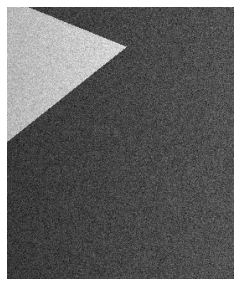

In [45]:
plt.figure(figsize=(10,5))
plt.imshow(img_septagon_window6,cmap='gray')
plt.axis('off')
plt.show()

# f)

In [46]:
list_of_images = [img_septagon_window1,img_septagon_window2,img_septagon_window3,img_septagon_window4,
                 img_septagon_window5,img_septagon_window6]
# For döngüsünde oluşan görüntüleri atamak için boş liste oluşturuldu
otsu_list = []

for i in list_of_images:
    # Histogramdaki değer sayısı
    bins_num = 256
    
    # Görüntünün Histogramı
    hist, bin_edges = np.histogram(i, bins=bins_num)

    # Normalize Histogram
    hist = np.divide(hist.ravel(), hist.max())

    # Merkezdeki değerleri bulma
    bin_mids = (bin_edges[:-1] + bin_edges[1:]) / 2.

    # cdf değerlerini bulup ağırlıklara eşitleme
    weight1 = np.cumsum(hist)
    weight2 = np.cumsum(hist[::-1])[::-1]

    # mean1 ve mean2 değerlerini bulma
    mean1 = np.cumsum(hist * bin_mids) / weight1
    mean2 = (np.cumsum((hist * bin_mids)[::-1]) / weight2[::-1])[::-1]

    inter_class_variance = weight1[:-1] * weight2[1:] * (mean1[:-1] - mean2[1:]) ** 2

    # maksimum değeri çekme işlemi
    index_of_max_val = np.argmax(inter_class_variance)
    #threshold değerinin bulunması
    threshold = bin_mids[:-1][index_of_max_val]
    print("Otsu's algorithm implementation thresholding result: ", threshold)
    # hesaplanan threshold değeri ile görüntünün thresholdunun alınması ve otsu listesine eklenmesi 
    _,otsu_img_septagon = cv2.threshold(i,threshold,255,cv2.THRESH_BINARY)
    otsu_list.append(otsu_img_septagon)

Otsu's algorithm implementation thresholding result:  37.06640625
Otsu's algorithm implementation thresholding result:  50.0703125
Otsu's algorithm implementation thresholding result:  63.04296875
Otsu's algorithm implementation thresholding result:  37.125
Otsu's algorithm implementation thresholding result:  49.83984375
Otsu's algorithm implementation thresholding result:  63.826171875


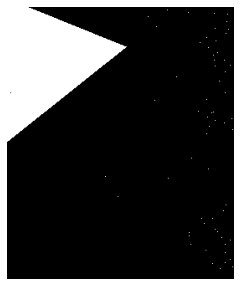

In [47]:
plt.figure(figsize=(10,5))
plt.imshow(otsu_list[5],cmap='gray')
plt.axis('off')
plt.show()

In [48]:
#Boş görüntü oluşturulup threshold yapılan parçalar yeni görüntüye doğru noktalardan eşitlendi

new_combine_otsu_outputs = np.zeros((651,814), np.float32)

new_combine_otsu_outputs[0:326,0:271] = otsu_list[0] 
new_combine_otsu_outputs[0:326,271:543] = otsu_list[1]
new_combine_otsu_outputs[0:326,543:] = otsu_list[2]
new_combine_otsu_outputs[326:,0:271] = otsu_list[3]
new_combine_otsu_outputs[326:,271:543]= otsu_list[4]
new_combine_otsu_outputs[326:,543:]= otsu_list[5]

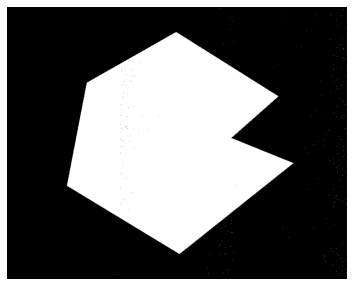

In [49]:
plt.figure(figsize=(10,5))
plt.imshow(new_combine_otsu_outputs,cmap='gray')
plt.axis('off')
plt.show()

In [50]:
cv2.imwrite('Fig1046(f).pgm',new_combine_otsu_outputs)

True

## 5)

(686, 772)


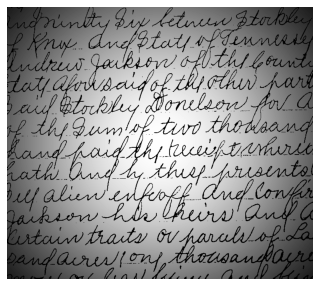

In [51]:
img_text_image = cv2.imread('Fig1049(a)(spot_shaded_text_image).pgm',0)
print(img_text_image.shape)

plt.figure(figsize=(10,5))
plt.imshow(img_text_image,cmap='gray')
plt.axis('off')
plt.show()


In [52]:
otsu_of_text_image = otsu_threshold(img_text_image)

Otsu's algorithm implementation thresholding result:  124.013671875


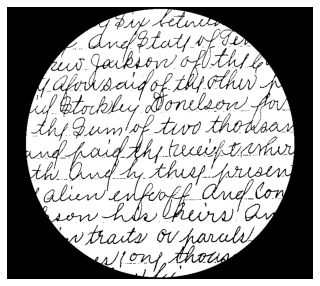

In [53]:
plt.figure(figsize=(10,5))
plt.imshow(otsu_of_text_image,cmap='gray')
plt.axis('off')
plt.show()

In [54]:
cv2.imwrite('Fig1049(b).pgm',otsu_of_text_image)

True